In [63]:
import numpy as np
import pandas as pd
import re
import xml.etree.ElementTree as ET
from sklearn.utils import shuffle
import gensim 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def readtags(doc):
    tree = ET.parse(doc)
    root = tree.getroot()
    name = doc.replace('.xml','')
    name = []
    for description in root.iter('seg'):
        p = description.text
        p=p.replace('\t','')
        p=p.replace('\n','')
        p = [p]
        name.append(p)
    return name

def readother(doc):
    tree = ET.parse(doc)
    root = tree.getroot()
    name = doc.replace('.xml','')
    name = []
    for description in root.iter('seg'):
        p = [description.text]
        name.append(p)
    return name

In [3]:
chinese = readtags('Chinese.xml')
arabic = readtags('Arabic.xml')
danish = readtags('Danish.xml')
dutch = readother('Dutch.xml')
english = readtags('English.xml')

In [4]:
english[0]

['In the beginning God created the heaven and the earth.']

In [5]:
for i in range(len(english)):
    english[i] = [word.lower() for word in english[i] if re.match('^[a-zA-Z]+', word)]
    english[i] = (' ').join(english[i])
    english[i] = [(re.sub(r'[^\w\s]','',english[i]))]
    english[i] = (' ').join(english[i])

In [6]:
english[0]

'in the beginning god created the heaven and the earth'

In [7]:
df = pd.DataFrame()
lan = ["English"] * len(english)
data_1 = pd.DataFrame({"Text": english,"Language": lan})
df.append(data_1)
data_1.head(1)

,Language,Text
0,English,in the beginning god created the heaven and th...


In [8]:
for i in range(len(arabic)):
    arabic[i] = (' ').join(arabic[i]).replace('.','')

In [9]:
arabic[:2]

['في البدء خلق الله السموات والارض',
 'وكانت الارض خربة وخالية وعلى وجه الغمر ظلمة وروح الله يرف على وجه المياه']

In [10]:
df = pd.DataFrame()
lan = ["Arabic"] * len(arabic)
data_2 = pd.DataFrame({"Text": arabic,"Language": lan})
df.append(data_2)
data_2.head(1)

,Language,Text
0,Arabic,في البدء خلق الله السموات والارض


In [11]:
for i in range(len(dutch)):
    dutch[i] = [x for x in dutch[i] if x is not None]
    dutch[i] = [word.lower() for word in dutch[i]]
    dutch[i] = ('').join(dutch[i]).replace('.','')
    dutch[i] = (re.sub(r'[^\w\s]','',dutch[i]))

In [12]:
df = pd.DataFrame()
lan = ["Dutch"] * len(dutch)
data_3 = pd.DataFrame({"Text": dutch,"Language": lan})
df.append(data_3)
data_3.head(1)

,Language,Text
0,Dutch,in het begin heeft god de hemelen en de aarde ...


In [13]:
for i in range(len(danish)):
    danish[i] = [word.lower() for word in danish[i]]
    danish[i] = [x for x in danish[i] if x is not None]
    danish[i] = ('').join(danish[i]).replace('.','')
    danish[i] = (re.sub(r'[^\w\s]','',danish[i]))

In [14]:
df = pd.DataFrame()
lan = ["Danish"] * len(danish)
data_4 = pd.DataFrame({"Text": danish,"Language": lan})
df.append(data_4)
data_4.head(1)

,Language,Text
0,Danish,i begyndelsen skabte gud himmelen og jorden


In [15]:
for i in range(len(chinese)):
    chinese[i] = ('').join(chinese[i])
    chinese[i] = (re.sub(r'[^\w\s]','',chinese[i]))

In [16]:
df = pd.DataFrame()
lan = ["Chinese"] * len(chinese)
data_5 = pd.DataFrame({"Text": chinese,"Language": lan})
df.append(data_5)
data_5.head(1)

,Language,Text
0,Chinese,起初 神 創造 天地


In [17]:
data = pd.concat([data_1, data_2,data_3,data_4,data_5], ignore_index=True)

In [18]:
data['Language'].value_counts()

Danish     31103
Arabic     31102
English    31102
Chinese    31101
Dutch      29098
Name: Language, dtype: int64

In [19]:
data = shuffle(data)

In [20]:
data.head()

,Language,Text
23675,English,and in the morning it will be foul weather to ...
26073,English,the next day john seeth jesus coming unto him ...
123439,Chinese,利亞 所 生 的 是 雅各 的 長子 流便 還有 西緬 利未 猶大 以 薩迦 西布倫
57662,Arabic,وقال بعض منهم ألم يقدر هذا الذي فتح عيني الاعم...
41166,Arabic,فقالوا له هكذا يقول حزقيا هذا اليوم يوم شدة وت...


In [71]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(data['Text'][:500])
words = vectorizer.get_feature_names()
print("words", words[:10])

words ['1254', '2400', '300', '45650', '70', 'aan', 'aanbidden', 'aangevallen', 'aangrijpen', 'aanvaardt']


In [72]:
dense = X.toarray()

In [73]:
len(dense)

500

In [74]:
import umap
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(dense)

In [75]:
df = pd.DataFrame(embedding, columns=('x', 'y'))

In [76]:
labels = list(data['Language'][:500])

In [77]:
df['class'] = labels

In [78]:
df.head()

,x,y,class
0,1.055175,-6.240817,English
1,0.328478,-7.701382,English
2,-0.159360,9.500788,Chinese
3,3.482600,4.580025,Arabic
4,3.764822,5.748725,Arabic


<Figure size 864x864 with 0 Axes>

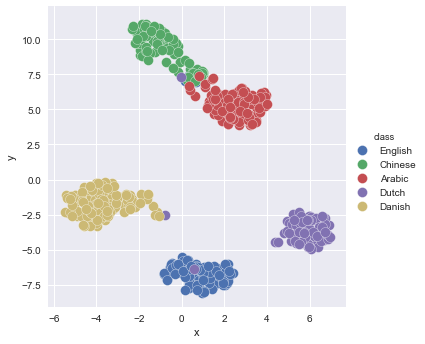

In [79]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",size=5, plot_kws={"s": 100});
plt.show()